In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import glob
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
cloudy=glob.glob('data/cloudy/*.jpg')
desert=glob.glob('data/desert/*.jpg')
green_area=glob.glob('data/green_area/*.jpg')
water=glob.glob('data/water/*.jpg')

In [3]:
image=[]
label=[]

for i in cloudy:
    img=plt.imread(i)
    image.append(img)
    label.append(0)
    
for i in desert:
    img=plt.imread(i)
    image.append(img)
    label.append(1)
    
    
for i in green_area:
    img=plt.imread(i)
    image.append(img)
    label.append(2)

    
for i in water:
    img=plt.imread(i)
    image.append(img)
    label.append(3)
    

In [4]:
image,label=shuffle(image,label,random_state=100)

In [5]:
labels={0:'cloudy',1:'desert',2:'green_area',3:'water'}

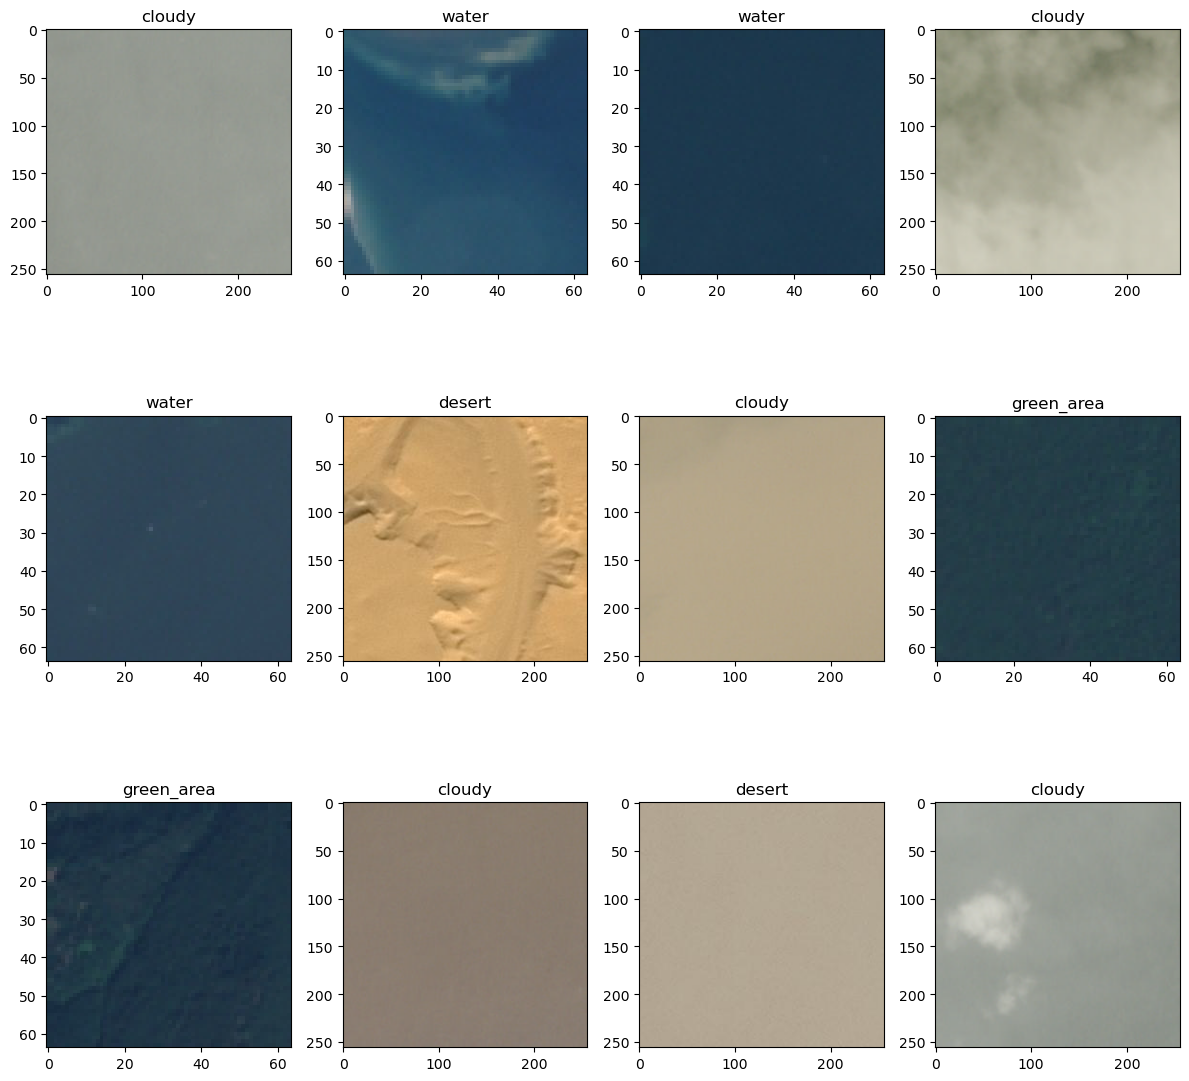

In [6]:
plt.figure(figsize=(12,12))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    plt.title(labels[label[i]])
plt.tight_layout()

In [7]:
for i in range(10):
    print( image[i].shape)

(256, 256, 4)
(64, 64, 3)
(64, 64, 3)
(256, 256, 4)
(64, 64, 3)
(256, 256, 3)
(256, 256, 4)
(64, 64, 3)
(64, 64, 3)
(256, 256, 4)


In [9]:
X=[]
for i in image:
    X.append(resize(i,(224,224,3)))

In [10]:
X=np.array(X)
y=np.array(label)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [16]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (224, 224, 3)),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(88, activation = 'relu'),
    keras.layers.Dense(4, activation = 'softmax')
])

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 88)                1

In [21]:
model.fit(X_train,y_train,epochs=10,validation_split=0.5)

Epoch 1/10
71/71 [==============================] - 64s 861ms/step - loss: 0.6419 - accuracy: 0.7562 - val_loss: 0.3205 - val_accuracy: 0.8557
Epoch 2/10
71/71 [==============================] - 53s 743ms/step - loss: 0.2255 - accuracy: 0.9001 - val_loss: 0.1921 - val_accuracy: 0.9170
Epoch 3/10
71/71 [==============================] - 53s 743ms/step - loss: 0.2201 - accuracy: 0.9121 - val_loss: 0.4395 - val_accuracy: 0.7957
Epoch 4/10
71/71 [==============================] - 52s 737ms/step - loss: 0.2788 - accuracy: 0.8637 - val_loss: 0.2033 - val_accuracy: 0.9174
Epoch 5/10
71/71 [==============================] - 51s 724ms/step - loss: 0.2702 - accuracy: 0.8810 - val_loss: 0.2767 - val_accuracy: 0.8681
Epoch 6/10
71/71 [==============================] - 51s 718ms/step - loss: 0.1946 - accuracy: 0.9063 - val_loss: 0.1510 - val_accuracy: 0.9276
Epoch 7/10
71/71 [==============================] - 54s 757ms/step - loss: 0.1680 - accuracy: 0.9218 - val_loss: 0.1479 - val_accuracy: 0.9334

In [22]:
model.evaluate(X_train,y_train)

141/141 [==============================] - 25s 177ms/step - loss: 0.1415 - accuracy: 0.9341


[0.14150096476078033, 0.9340586066246033]

In [23]:
y_pred=model.predict(X_test)

36/36 [==============================] - 11s 161ms/step


In [24]:
y_pred=[np.argmax(i) for i in y_pred]

In [26]:
accuracy_score(y_test,y_pred)

0.9325643300798581

<Axes: >

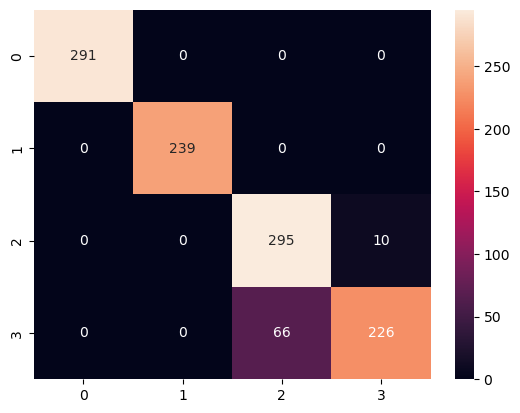

In [27]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       239
           2       0.82      0.97      0.89       305
           3       0.96      0.77      0.86       292

    accuracy                           0.93      1127
   macro avg       0.94      0.94      0.94      1127
weighted avg       0.94      0.93      0.93      1127

